# Chest X-Ray Classification Analysis

# Imports

In [4]:
import os

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from PIL import Image, ImageFile

# Create Paths

In [31]:
PATH = "/Users/maukanmir/Downloads/chest_xray/"
train_path, val_path, test_path = PATH + "train/", PATH + "val/", PATH + "test/"

# Constants

In [3]:
BATCH_SIZE = 32
INPUT_SHAPE = (224,224,3)

# Functions

In [20]:
ImageFile.LOAD_TRUNCATED_IMAGES = True

def process_load_image(img_path, target_size=INPUT_SHAPE):
  try:
    with Image.open(img_path) as img:
      img = img.resize(target_size[:2])
      img = img.convert("RGB")
      
      img_array = np.array(img)/255.0
      img_array = img_array.astype(np.float32)
      return img_array
  except IOError as e:
    print(f"Failure in loading this image: {e}")
    return None


def grab_images(path):
  
  images, labels = [],[]
  
  for root, dirs, files in os.walk(path):
    for file in files:
      if file.lower().endswith((".png", ".jpeg", ".jpg")):
        img_path = os.path.join(root, file)
        img = process_load_image(img_path)
        if img is not None:
          images.append(img)
          label = root.split(os.sep)[-1]
          labels.append(label)
  
  images, labels = np.array(images), np.array(labels)
  
  return images, labels

def check_class_imbalance(target):
  
  unique, counts = np.unique(target, return_counts=True)
  plt.figure(figsize=(10, 6))
  plt.pie(counts, labels=unique, autopct="%1.1f%%", startangle=140)
  plt.title("Target Class Breakdown")
  plt.show()
  
  plt.figure(figsize=(10, 6))
  sns.countplot(x=target)
  plt.xlabel("Target Classes")
  plt.ylabel("Counts")
  plt.title("Target Class breakdown")
  plt.xticks(rotation=45)
  plt.show()

# Load and Extract Images

In [34]:
X_train, y_train = grab_images(train_path)
X_val, y_val = grab_images(val_path)
X_test, y_test = grab_images(test_path)

# Dataset Shapes

In [35]:
print(f'Training set size: {X_train.shape[0]}')
print(f'Validation set size: {X_val.shape[0]}')
print(f'Test set size: {X_test.shape[0]}')

Training set size: 5216
Validation set size: 16
Test set size: 624


# Check Class Imbalance

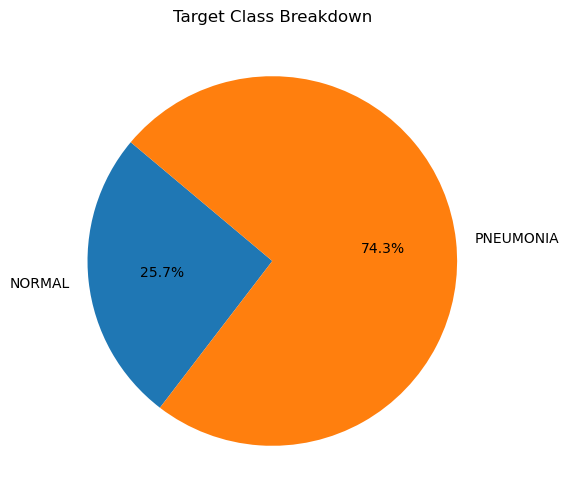

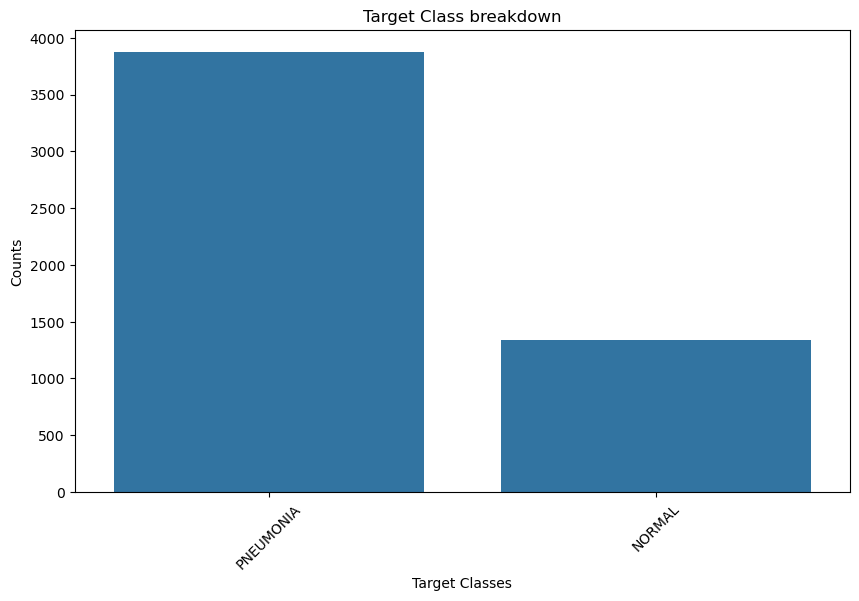

In [36]:
check_class_imbalance(y_train)

# We have an imbalanced dataset